# # 📊Exploratory Data Analysis of Titanic Passenger Survival
# **Author:** Earnest Ouma Andele 
# **Date:** 7/21/2025
# **Goal:** Identify key factors influencing passenger survival
# **Dataset:** Titanic passenger records (n=5,000)

# ## 2. Setup
# Import libraries and load data.

In [79]:
# core libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams



In [80]:

# Set consistent style
sns.set_theme(
    style="darkgrid",              # Clean grid background
    palette="husl",                 # Color palette
    font="DejaVu Sans",             # Font family
    rc={
        'figure.figsize': (10,6),   # Figure size
        'axes.titlesize': 14,       # Title size
        'axes.titleweight': 'bold', # Title weight
        'axes.labelweight': 'bold'  # Axis label weight
    }
)

# Color scheme
SURVIVAL_PALETTE = {0: "#470404ff", 1: '#2ecc71'}
CLASS_PALETTE = ['#3498db', '#9b59b6', "#0d11e0dd"]
GENDER_PALETTE = {'male': '#3498db', 'female': "#e91e63"}

In [81]:
# Load the dataset
df = pd.read_csv("C:/Users/Earnest/Desktop/School of Statistician/week9_titanic_eda_data.csv")

1. How many passengers are in the dataset?

In [82]:
num_passengers = df.shape[0]
print(f"There are {num_passengers} passengers in the dataset.")

There are 5000 passengers in the dataset.


2. Summarize the dataset

In [83]:
# Basic info
print("\nDataset Info:")
print(df.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  5000 non-null   int64  
 1   Survived     5000 non-null   int64  
 2   Pclass       5000 non-null   int64  
 3   Name         5000 non-null   object 
 4   Sex          5000 non-null   object 
 5   Age          4700 non-null   float64
 6   SibSp        5000 non-null   int64  
 7   Parch        5000 non-null   int64  
 8   Ticket       5000 non-null   int64  
 9   Fare         5000 non-null   float64
 10  Cabin        4141 non-null   object 
 11  Embarked     5000 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 468.9+ KB
None

Descriptive Statistics:


        PassengerID     Survived       Pclass    Name   Sex          Age  \
count   5000.000000  5000.000000  5000.000000    5000  5000  4700.000000   
unique          NaN          NaN          NaN    5000     2          NaN   
top             NaN          NaN          NaN  Name_1  male          NaN   
freq            NaN          NaN          NaN       1  2547          NaN   
mean    2500.500000     0.499200     2.001000     NaN   NaN    29.935660   
std     1443.520003     0.500049     0.815066     NaN   NaN    13.994801   
min        1.000000     0.000000     1.000000     NaN   NaN   -24.900000   
25%     1250.750000     0.000000     1.000000     NaN   NaN    20.575000   
50%     2500.500000     0.000000     2.000000     NaN   NaN    29.800000   
75%     3750.250000     1.000000     3.000000     NaN   NaN    39.400000   
max     5000.000000     1.000000     3.000000     NaN   NaN    79.400000   

              SibSp        Parch        Ticket         Fare Cabin Embarked  
count   50

3. Distribution of survival


Survival Counts:
Survived
0    2504
1    2496
Name: count, dtype: int64


C:\Users\Earnest\AppData\Local\Temp\ipykernel_6880\3236333722.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=df, palette=SURVIVAL_PALETTE.values())


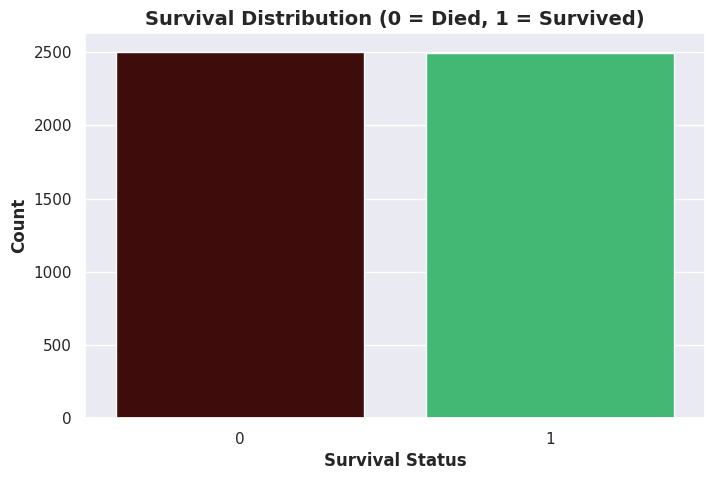

In [84]:
# Count of survivors vs non-survivors
survival_counts = df['Survived'].value_counts()
print("\nSurvival Counts:")
print(survival_counts)

# Bar chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=df, palette=SURVIVAL_PALETTE.values())
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

4. Distribution of passenger classes


Passenger Class Counts:
Pclass
1    1658
2    1679
3    1663
Name: count, dtype: int64


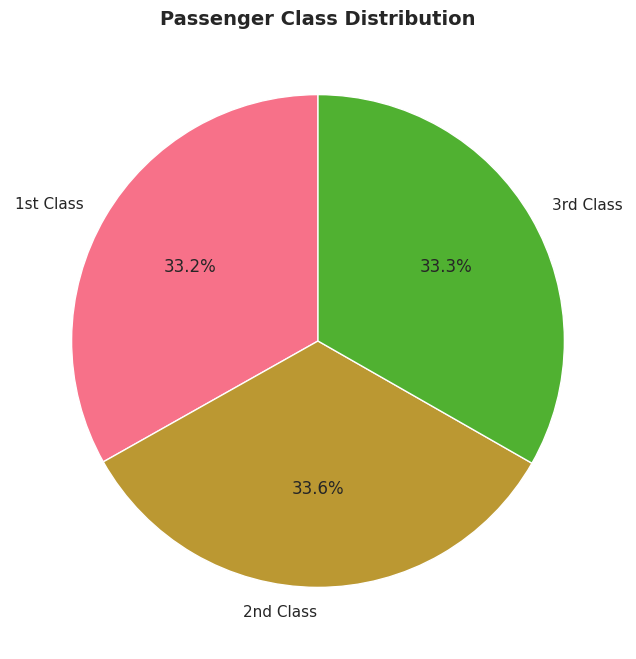

In [85]:
# Count of passenger classes
class_counts = df['Pclass'].value_counts().sort_index()
print("\nPassenger Class Counts:")
print(class_counts)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['1st Class', '2nd Class', '3rd Class'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.show()


5. Age distribution of passengers


Missing Age values: 300


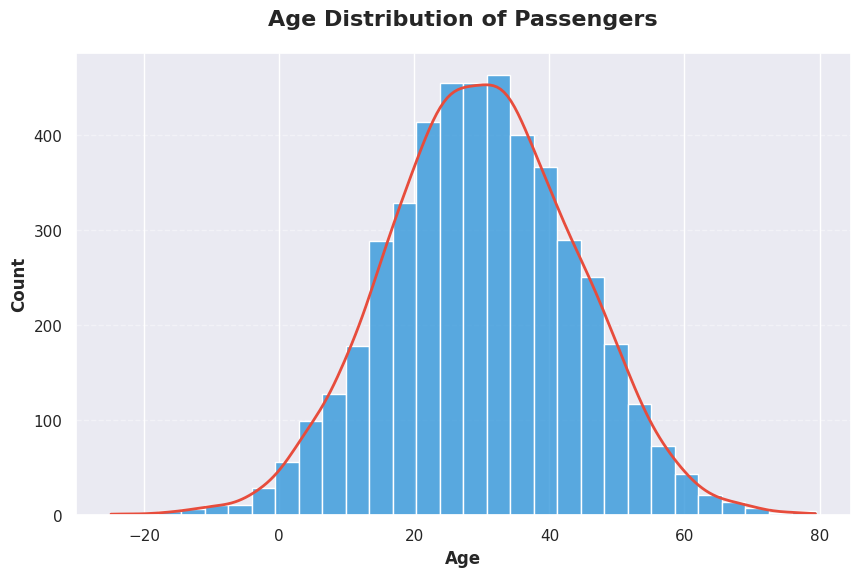

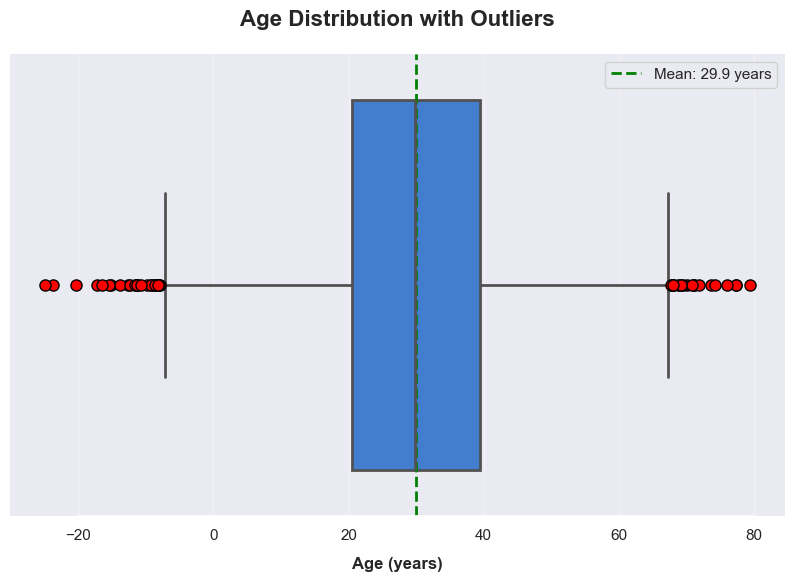

In [86]:
# Handle missing values in Age (already handled in describe, but let's check)
print("\nMissing Age values:", df['Age'].isnull().sum())

plt.figure(figsize=(10, 6))
hist = sns.histplot(
    df['Age'].dropna(), 
    bins=30, 
    kde=True, 
    color='#3498db',
    edgecolor='white', 
    linewidth=1, 
    alpha=0.8,  
)

if hist.lines:  
    hist.lines[0].set_color('#e74c3c') 
    hist.lines[0].set_linewidth(2)

plt.title('Age Distribution of Passengers', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)  


plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context
sns.set_style("dark")  # Clean background with grid
plt.figure(figsize=(10, 6))  # Slightly larger for clarity

# Customize boxplot (single color with outlier emphasis)
box = sns.boxplot(
    x=df['Age'].dropna(),
    color='#2c7be5',  # Primary color (adjust as needed)
    linewidth=2,  # Thicker box lines
    flierprops={  # Outlier styling
        'marker': 'o',           # Circle markers
        'markerfacecolor': 'red',  # Red fill for outliers
        'markersize': 8,          # Larger size
        'markeredgecolor': 'black'  # Black border for contrast
    }
)

# Titles and labels
plt.title(
    'Age Distribution with Outliers', 
    fontsize=16, 
    pad=20, 
    fontweight='bold'  # Bold title
)
plt.xlabel(
    'Age (years)', 
    fontsize=12, 
    labelpad=10  # Spacing below x-axis
)

# Add mean line (optional)
mean_val = df['Age'].mean()
plt.axvline(
    mean_val, 
    color='green', 
    linestyle='--', 
    linewidth=2, 
    label=f'Mean: {mean_val:.1f} years'
)
plt.legend()  # Show mean label

# Remove top/right spines and adjust grid
sns.despine(trim=True)  # Cleaner axes
plt.grid(axis='x', alpha=0.3)  # Light vertical grid (optional)

plt.show()


6. Relationship between Age and Survival

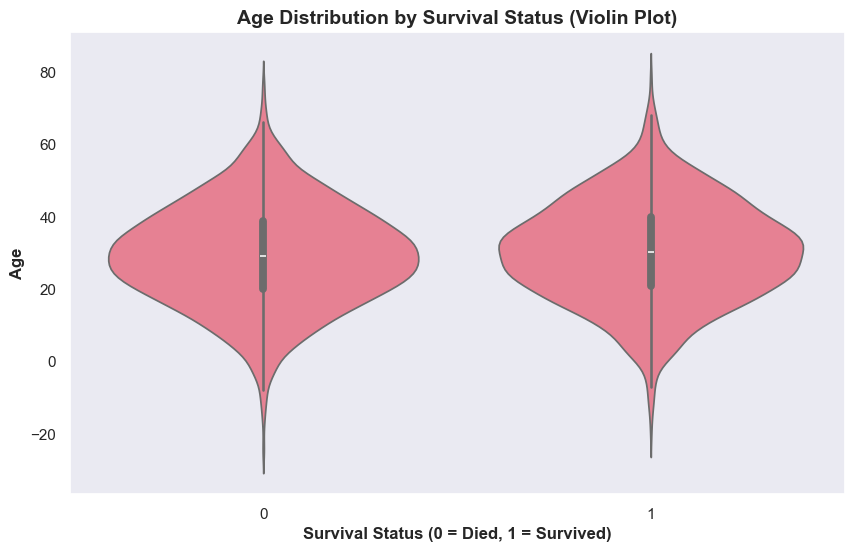

In [87]:
# Violin plot alternative
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survival Status (0 = Died, 1 = Survived)')
plt.ylabel('Age')
plt.show()

7. Gender breakdown and survival by gender


Gender Counts:
Sex
male      2547
female    2453
Name: count, dtype: int64


C:\Users\Earnest\AppData\Local\Temp\ipykernel_6880\2236270896.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


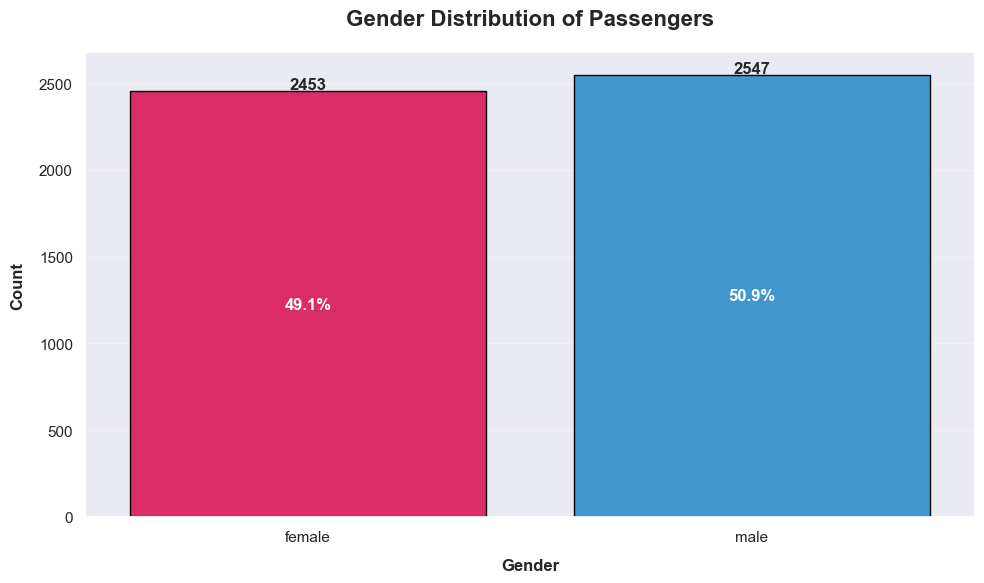

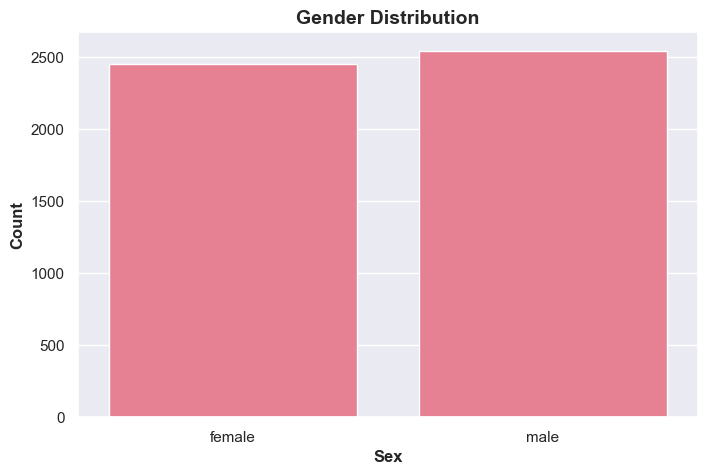


Survival by Gender:
Survived     0     1
Sex                 
female    1237  1216
male      1267  1280


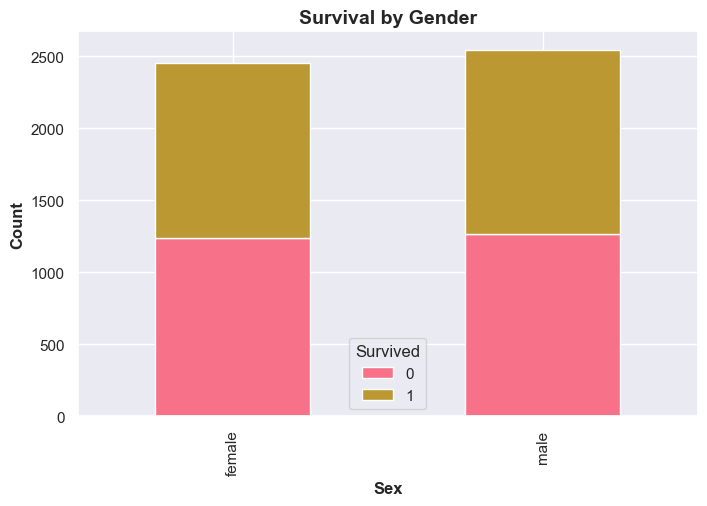

In [88]:
# Gender distribution
gender_counts = df['Sex'].value_counts()
print("\nGender Counts:")
print(gender_counts)

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Create countplot with custom colors and styling
ax = sns.countplot(
    x='Sex',
    data=df,
    palette={'male': '#3498db', 'female': '#e91e63'},  # Blue for male, pink for female
    edgecolor='black',  # Black borders on bars
    linewidth=1,       # Border thickness
    saturation=0.85    # Slightly desaturated colors
)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

# Customize title and labels
plt.title('Gender Distribution of Passengers', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Gender', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Calculate and display percentage composition
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.text(
        p.get_x() + p.get_width()/2.,
        p.get_height()/2,
        percentage,
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Improve grid and remove unnecessary spines
sns.despine(left=True)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# Survival by gender
gender_survival = pd.crosstab(df['Sex'], df['Survived'])
print("\nSurvival by Gender:")
print(gender_survival)

# Stacked bar chart
gender_survival.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.show()

8. Siblings/spouses and parents/children aboard


SibSp Statistics:
count    5000.000000
mean        2.462400
std         1.718132
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: SibSp, dtype: float64

Parch Statistics:
count    5000.000000
mean        2.563600
std         1.684079
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Parch, dtype: float64


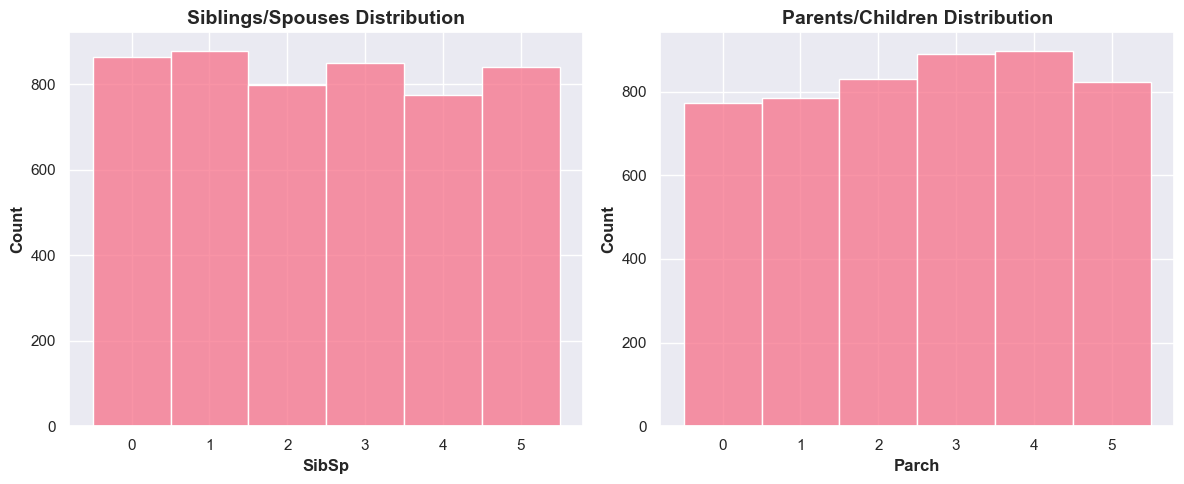

In [89]:
# SibSp and Parch statistics
print("\nSibSp Statistics:")
print(df['SibSp'].describe())

print("\nParch Statistics:")
print(df['Parch'].describe())

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SibSp'], bins=range(0, 9), discrete=True)
plt.title('Siblings/Spouses Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Parch'], bins=range(0, 7), discrete=True)
plt.title('Parents/Children Distribution')
plt.tight_layout()
plt.show()